## Importing python libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import re

### Loading Dataset 

In [2]:
df_mobile_price = pd.read_csv('Processed_Flipdata - Processed_Flipdata.csv')
df_mobile_price.head()
df_mobile_price.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

## Dropping 'Unnamed: 0' column from the given dataset

In [3]:
df_mobile_price=df_mobile_price.drop(columns=['Unnamed: 0'])  ## dropping 'Unnamed: 0' column
df_mobile_price.head()   ## checking dataset after dropping 'Unnamed: 0' column

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


## Shape of original given dataset after dropping 'Unnamed: 0' column

In [4]:
shape = df_mobile_price.shape
print(f"Number of rows in given dataset are {shape[0]} and columns are {shape[1]}")

Number of rows in given dataset are 541 and columns are 11


### Dataset Info

In [5]:
df_mobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ KB


Null value not present in any column

## Cleaning of data

In [6]:
df_mobile_price.drop_duplicates  ## dropping duplicates
df_mobile_price.shape ## checking shape of dataset after removing duplicates. 

(541, 11)

## Creating New Columns - Brand_Name and Model_Name

In [7]:
df_mobile_price['Brand_Name'] = df_mobile_price['Model'].astype("string").str.split().str[0]  ## spliting Model into Brand_Name and Model_Name
df_mobile_price['Model_Name'] = df_mobile_price['Model'].astype("string").str.split(n=1).str[1]     


In [8]:
print("Null values for Model_Name",df_mobile_price['Model_Name'].isnull().sum())
print("Null values for Brand_Name",df_mobile_price['Brand_Name'].isnull().sum())

Null values for Model_Name 4
Null values for Brand_Name 0


Checking null values exact rows which contains missing values - NaN

In [9]:
df_mobile_price[df_mobile_price['Model_Name'].isnull()]

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Brand_Name,Model_Name
116,micromax,OMG Black,128,4,1000,0MP,0MP,0,4.5,SC6531E,"1,422",micromax,NaN
181,micromax,Light Silver,32,3,2550,0MP,0MP,0,4.5,SC6531E,"1,375",micromax,NaN
182,micromax1,Light Silver,32,3,800,0MP,0MP,0,4.5,SC6531E,"1,599",micromax1,NaN
250,micromax,Lake Blue,64,4,1500,0MP,0MP,0,6.1,Mediatek MT6261D,"1,199",micromax,NaN


Replacing the NaN values with unknown

In [10]:
df_mobile_price['Model_Name'] = df_mobile_price['Model_Name'].fillna('unknown')   ## replacing the NaN value with 'unknown'

In [11]:
df_mobile_price.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Brand_Name,Model_Name
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Infinix,SMART 7
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Infinix,SMART 7
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999",MOTOROLA,G32
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649",POCO,C50
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Infinix,HOT 30i


In [12]:
df_mobile_price['Brand_Name'].value_counts() # checking count of each category 


Brand_Name
realme       98
REDMI        68
Infinix      65
vivo         62
POCO         60
SAMSUNG      55
MOTOROLA     46
Tecno        17
OPPO         16
micromax      9
Google        9
redmi         5
OnePlus       5
APPLE         5
Micromax      4
Nokia         3
itel          3
IQOO          2
nothing       2
Redmi         2
I             2
LAVA          2
micromax1     1
Name: count, dtype: int64

Redmi has appeared mulitple times in Brand_Name column - REDMI, redmi and Redmi. Merging all of them as 'Redmi'

In [13]:
mask = df_mobile_price['Brand_Name'].astype("string").str.contains("Redmi",case=False,na=False)
df_mobile_price.loc[mask,'Brand_Name'] = "Redmi"

Micromax has also appeared multiple times - micromax, Micromax and micromax1. Converting all of them to 'Micromax'

In [14]:
mask = df_mobile_price['Brand_Name'].astype("string").str.contains("Micromax",case=False,na=False)
df_mobile_price.loc[mask,'Brand_Name'] = "Micromax"

In [15]:
df_mobile_price['Brand_Name'].value_counts()   ## checking category count after converting Redmi and micromax rows.

Brand_Name
realme      98
Redmi       75
Infinix     65
vivo        62
POCO        60
SAMSUNG     55
MOTOROLA    46
Tecno       17
OPPO        16
Micromax    14
Google       9
OnePlus      5
APPLE        5
Nokia        3
itel         3
nothing      2
I            2
IQOO         2
LAVA         2
Name: count, dtype: int64

In [16]:
df_mobile_price['Model_Name'].value_counts() # checking count of each category

Model_Name
C55               14
10                11
Note 12 Pro 5G    11
Y16                9
Galaxy A14 5G      9
                  ..
Galaxy A04e        1
Galaxy S23 5G      1
Z21                1
Spark 8T           1
A77                1
Name: count, Length: 177, dtype: int64

## Re-arranging Brand_Name and Model_Name columns and Deleting Model column

In [17]:
col = df_mobile_price.pop('Brand_Name')    # pop the Brand_Name column and stored in col variable
df_mobile_price.insert(0,'Brand_Name',col) # insert the Brand_Name column at 0 index

In [18]:
col1 = df_mobile_price.pop('Model_Name') ## pop the Model_Name column and stored in col variable
df_mobile_price.insert(1,'Model_Name',col1) ### insert the Model_Name column at 1 index

In [19]:
df_mobile_price = df_mobile_price.drop(columns=(['Model']))   ## Dropping Model column

In [20]:
df_mobile_price.head()

,Brand_Name,Model_Name,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix,SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix,SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA,G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO,C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix,HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


## Moving Snapdragon and Qualcomm values to Prossor_Vendor Column and converting all those values to Qualcomm

In [21]:
df_mobile_price['Processor_Vendor'] = pd.NA

In [22]:

s = df_mobile_price['Processor_'].astype(str)

mask = (
    s.str.contains("snapdragon", case = False, na = False) | 
    s.str.contains("qualcomm", case = False, na = False) 
)


In [23]:

df_mobile_price.loc[mask,'Processor_Vendor'] = 'Qualcomm'



In [24]:
print("Null values for column Processor_Vendor:",df_mobile_price['Processor_Vendor'].isnull().sum())   # checking null values.
print("\n")
print(df_mobile_price['Processor_Vendor'].value_counts())   # checking category values.

Null values for column Processor_Vendor: 411


Processor_Vendor
Qualcomm    130
Name: count, dtype: int64


## Moving ios, IOS and 6 Core values to Prossor_Vendor Column and converting all those values to Apple

In [25]:
s = df_mobile_price['Processor_'].astype("string")

mask = (
    s.str.contains('ios',case=False,na=False) |
    s.str.contains('6core',case=False,na=False)

)

In [26]:
df_mobile_price.loc[mask,'Processor_Vendor'] = 'Apple'

In [27]:
print("Null values for column Processor_Vendor:",df_mobile_price['Processor_Vendor'].isnull().sum())   # checking null values.
print("\n")
print(df_mobile_price['Processor_Vendor'].value_counts())   # checking category values.

Null values for column Processor_Vendor: 407


Processor_Vendor
Qualcomm    130
Apple         4
Name: count, dtype: int64


## Moving Google Tensor, Tensor G2 and Google Tensor G2 values to Prossor_Vendor Column and converting all those values to Google

In [28]:
s = df_mobile_price['Processor_'].astype("string")

mask = (
    s.str.contains('Tensor',case=False,na=False)
)

In [29]:
df_mobile_price.loc[mask,'Processor_Vendor'] = 'Google'

In [30]:
print("Null values for column Processor_Vendor:",df_mobile_price['Processor_Vendor'].isnull().sum())   # checking null values.
print("\n")
print(df_mobile_price['Processor_Vendor'].value_counts())   # checking category values.

Null values for column Processor_Vendor: 399


Processor_Vendor
Qualcomm    130
Google        8
Apple         4
Name: count, dtype: int64


## Moving mediatek, mediatek, helio ,dimensity ,mtk and mt values to Prossor_Vendor Column and converting all those values to MediaTek

In [31]:
s = df_mobile_price['Processor_'].astype("string")

mask = (
    s.str.contains('mediatek',case=False,na=False)|
    s.str.contains('medaitek',case=False,na=False)|
    s.str.contains('helio',case=False,na=False)|
    s.str.contains('dimensity',case=False,na=False)|
    s.str.contains('mtk',case=False,na=False)|
    s.str.contains('mtk',case=False,na=False)

)

In [32]:
df_mobile_price.loc[mask,'Processor_Vendor'] = 'MediaTek'

In [33]:
print("Null values for column Processor_Vendor:",df_mobile_price['Processor_Vendor'].isnull().sum())   # checking null values.
print("\n")
print(df_mobile_price['Processor_Vendor'].value_counts())   # checking category values.

Null values for column Processor_Vendor: 123


Processor_Vendor
MediaTek    276
Qualcomm    130
Google        8
Apple         4
Name: count, dtype: int64


## Moving unisoc, spreadtrum and sc values to Prossor_Vendor Column and converting all those values to Unisoc

In [34]:
s = df_mobile_price['Processor_'].astype("string")

mask = (
    s.str.contains('unisoc',case=False,na=False)|
    s.str.contains('spreadtrum',case=False,na=False)|
    s.str.contains('uni',case=False,na=False)
)

In [35]:
df_mobile_price.loc[mask,'Processor_Vendor'] = 'Unisoc'

In [36]:
print("Null values for column Processor_Vendor:",df_mobile_price['Processor_Vendor'].isnull().sum())   # checking null values.
print("\n")
print(df_mobile_price['Processor_Vendor'].value_counts())   # checking category values.

Null values for column Processor_Vendor: 62


Processor_Vendor
MediaTek    276
Qualcomm    130
Unisoc       61
Google        8
Apple         4
Name: count, dtype: int64


## Moving samsung exynos or exynos to Prossor_Vendor Column and converting all those values to Samsung

In [37]:
s = df_mobile_price['Processor_'].astype("string")

mask = (
    s.str.contains('samsung',case=False,na=False)|
    s.str.contains('exynos',case=False,na=False)
)

In [38]:
df_mobile_price.loc[mask,'Processor_Vendor'] = 'Samsung'

In [39]:
print("Null values for column Processor_Vendor:",df_mobile_price['Processor_Vendor'].isnull().sum())   # checking null values.
print("\n")
print(df_mobile_price['Processor_Vendor'].value_counts())   # checking category values.

Null values for column Processor_Vendor: 32


Processor_Vendor
MediaTek    276
Qualcomm    130
Unisoc       61
Samsung      30
Google        8
Apple         4
Name: count, dtype: int64


## Remaining 32 entries which have incomplete processor name or without vendor name or half information marked them as other/unknown

In [40]:
df_mobile_price['Processor_Vendor'] = df_mobile_price['Processor_Vendor'].replace(np.nan,'Other/Unknown')

In [41]:
print("Null values for column Processor_Vendor:",df_mobile_price['Processor_Vendor'].isnull().sum())   # checking null values.
print("\n")
print(df_mobile_price['Processor_Vendor'].value_counts())   # checking category values.
print("\n")
print(df_mobile_price['Processor_Vendor'].unique()) #checking unique values.

Null values for column Processor_Vendor: 0


Processor_Vendor
MediaTek         276
Qualcomm         130
Unisoc            61
Other/Unknown     32
Samsung           30
Google             8
Apple              4
Name: count, dtype: int64


['Unisoc' 'Qualcomm' 'MediaTek' 'Other/Unknown' 'Samsung' 'Google' 'Apple']


In [42]:
df_mobile_price.head(20)  ## Checking dataframe after creating new column 'Processor_Vendor'

,Brand_Name,Model_Name,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_Vendor
0,Infinix,SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc
1,Infinix,SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc
2,MOTOROLA,G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999",Qualcomm
3,POCO,C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649",MediaTek
4,Infinix,HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown
5,Infinix,HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown
6,Infinix,HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown
7,Infinix,HOT 30i,Diamond White,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown
8,Infinix,HOT 30i,Diamond White,64,4,5000,50MP,5MP,1,16.76,G37,"7,999",Other/Unknown
9,Infinix,HOT 30i,Mirror Black,64,4,5000,50MP,5MP,1,16.76,G37,"7,999",Other/Unknown


## Feature Scaling of 'Colour' column

1) Treating black colour - Any data point contains 'Black' and 'Graphite' will be replaced with Black, example - Mirror Black, Night Black, Awesome Graphite -> replaced with -> Black

In [43]:
df_mobile_price['Color_Normalized'] = np.nan   # creating a new column Color_Normalized which will store the normalized value of Colour column

Looking for rows which contains 'Black' and 'Graphite' value in Colour column

In [44]:
mask = (df_mobile_price['Colour'].astype("string").str.contains("Black",case=False,na=False)) | (df_mobile_price['Colour'].astype("string").str.contains("Graphite",case=False,na=False)) 

Replacing the above value with Black and stored in newly created column 'Color_Normalized'

In [45]:
df_mobile_price.loc[mask,'Color_Normalized'] = "Black"

C:\Users\simranbhatti\AppData\Local\Temp\ipykernel_10096\4180012016.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Black' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_mobile_price.loc[mask,'Color_Normalized'] = "Black"


In [46]:
df_mobile_price.head(20)          # checking data set after treating Colour column for black colours. 

,Brand_Name,Model_Name,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_Vendor,Color_Normalized
0,Infinix,SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc,Black
1,Infinix,SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc,NaN
2,MOTOROLA,G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999",Qualcomm,NaN
3,POCO,C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649",MediaTek,NaN
4,Infinix,HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,NaN
5,Infinix,HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,NaN
6,Infinix,HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,Black
7,Infinix,HOT 30i,Diamond White,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,NaN
8,Infinix,HOT 30i,Diamond White,64,4,5000,50MP,5MP,1,16.76,G37,"7,999",Other/Unknown,NaN
9,Infinix,HOT 30i,Mirror Black,64,4,5000,50MP,5MP,1,16.76,G37,"7,999",Other/Unknown,Black


2) Treating Gray colour - Any data point contains 'Gray','Grey' and 'Charcoal' will be replaced with Gray, 
   example - Charcoal Grey -> Gray
             Gray Shadow ->  Gray

Looking for rows which contains 'Gray','Grey' and 'Charcoal' value in 'Colour' column


In [47]:

mask = (df_mobile_price['Colour'].astype('string').str.contains("Grey",case=False,na=False))|(df_mobile_price['Colour'].astype('string').str.contains("Gray",case=False,na=False))|(df_mobile_price['Colour'].astype('string').str.contains("Charcoal",case=False,na=False))  

Replacing the values of above filtered rows with Gray

In [48]:
df_mobile_price.loc[mask,'Color_Normalized'] = "Gray"

In [49]:
df_mobile_price.head(20)          # checking data set after treating Colour column

,Brand_Name,Model_Name,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_Vendor,Color_Normalized
0,Infinix,SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc,Black
1,Infinix,SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc,NaN
2,MOTOROLA,G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999",Qualcomm,Gray
3,POCO,C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649",MediaTek,NaN
4,Infinix,HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,NaN
5,Infinix,HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,NaN
6,Infinix,HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,Black
7,Infinix,HOT 30i,Diamond White,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,NaN
8,Infinix,HOT 30i,Diamond White,64,4,5000,50MP,5MP,1,16.76,G37,"7,999",Other/Unknown,NaN
9,Infinix,HOT 30i,Mirror Black,64,4,5000,50MP,5MP,1,16.76,G37,"7,999",Other/Unknown,Black


3) Treating multiple colors at once for Colour column i.e, Any data point contains 'White','Green','Gold','Silver','Purple','Orange','Red','Brown','Yellow'-> will be replaced -> 'White','Green','Gold','Silver','Purple','Orange','Red','Brown','Yellow' respectively. 

    Example Opal Green, Emerald Green -> replaced with -> Green 

            Diamond White -> replaced with -> White

            'Sunrise Orange','Sunset Orange' -> replaced with -> Orange

Looking for the rows which contains ->'White','Green','Gold','Blue','Silver','Purple','Orange','Red','Brown','Yellow'

In [50]:
colors = ['White','Green','Gold','Blue','Silver','Purple','Orange','Red','Brown','Yellow']  # color value stored

for col_values in colors:
    pattern = rf"\b{re.escape(col_values)}\b"                    # this will select the color in each iteration
    mask = df_mobile_price['Colour'].astype("string").str.contains(pattern,case=False,na=False) # this will select the rows which contain color pattern
    df_mobile_price.loc[mask,'Color_Normalized'] = col_values                                   # this will replace the values of above feteched rows with col_values                                   


In [51]:
df_mobile_price.head(20)          # checking data set after treating Colour column for black colours. 

,Brand_Name,Model_Name,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_Vendor,Color_Normalized
0,Infinix,SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc,Black
1,Infinix,SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc,Blue
2,MOTOROLA,G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999",Qualcomm,Gray
3,POCO,C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649",MediaTek,Blue
4,Infinix,HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,NaN
5,Infinix,HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,Blue
6,Infinix,HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,Black
7,Infinix,HOT 30i,Diamond White,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,White
8,Infinix,HOT 30i,Diamond White,64,4,5000,50MP,5MP,1,16.76,G37,"7,999",Other/Unknown,White
9,Infinix,HOT 30i,Mirror Black,64,4,5000,50MP,5MP,1,16.76,G37,"7,999",Other/Unknown,Black


4) Handling unknown colour type. Example 'Velocity Wave' and 'M3)' -> Others/Unknown

In [52]:
mapping = {"Velocity Wave":"Other/Unknown",
           "M3)":"Other/Unknown",
           "Nitro Blaze":"Other/Unknown",
           "Night Sea":"Other/Unknown",
           "Sunshower":"Other/Unknown",
           "Rainy Night":"Other/Unknown",
           "Dark Matter":"Other/Unknown",
           "Hyperspace":"Other/Unknown",
           "Dancing waves":"Other/Unknown",
           "Deepsea Luster":"Other/Unknown",
           "Starlight":"Other/Unknown",
           "Moonlight Shadow":"Other/Unknown"
           }


Amend the Color_Normalized column with mapping(for unknown color type)

In [53]:
df_mobile_price['Colour'] = df_mobile_price['Colour'].replace(mapping)   # replace the unknown color type with Other/Unknown in Colour column
mask = (df_mobile_price['Colour'] == "Other/Unknown")                    # look for the rows where above code executed
df_mobile_price.loc[mask,'Color_Normalized'] = "Other/Unknown"           # for the above filtered rows, subtitue NaN with Other/Unknown


In [54]:
print(df_mobile_price['Color_Normalized'].unique())                      # checking unique values
print(df_mobile_price['Color_Normalized'].value_counts())                # color count

['Black' 'Blue' 'Gray' nan 'White' 'Green' 'Gold' 'Purple' 'Silver'
 'Orange' 'Other/Unknown' 'Yellow' 'Brown' 'Red']
Color_Normalized
Black            138
Blue             131
Green             54
Other/Unknown     31
Gray              27
White             27
Gold              19
Silver            16
Purple            16
Yellow            12
Orange            10
Red                5
Brown              1
Name: count, dtype: int64


5) Handling color type which could fall under Blue color

Look for the rows in Colour column which contains "Aqua Sky","Azure Glow","Starry Glow","Night Sea","Sky Mirror","Sea","DawnBlue","Heart Of Ocean","Interstellar Glow","Turquoise Cyan","Turbo Cyan","Cyan",""Starry Sky

In [55]:
mask_blue = df_mobile_price['Colour'].isin(["Aqua Sky","Azure Glow","Starry Glow","Night Sea","Sky Mirror","Sea","DawnBlue","Heart Of Ocean","Interstellar Glow","Turquoise Cyan","Turbo Cyan","Cyan","Starry Sky"])

In [56]:
df_mobile_price.loc[mask_blue,'Color_Normalized'] = "Blue" #replacing the extraced rows with Blue 

In [57]:
print(df_mobile_price['Color_Normalized'].unique())                      # checking unique values
print(df_mobile_price['Color_Normalized'].value_counts())                # color count

['Black' 'Blue' 'Gray' nan 'White' 'Green' 'Gold' 'Purple' 'Silver'
 'Orange' 'Other/Unknown' 'Yellow' 'Brown' 'Red']
Color_Normalized
Blue             150
Black            138
Green             54
Other/Unknown     31
Gray              27
White             27
Gold              19
Silver            16
Purple            16
Yellow            12
Orange            10
Red                5
Brown              1
Name: count, dtype: int64


6) Handling color type which could fall under Green color

Looking rows in Colour column which contains value "Rainforest","VertMenthe","Jade Fog","Lemongrass","Awesome Lime"

In [58]:
mask_green = df_mobile_price['Colour'].isin(["Rainforest","VertMenthe","Jade Fog","Lemongrass","Awesome Lime"])

In [59]:
df_mobile_price.loc[mask_green,'Color_Normalized'] = "Green"   #replacing the extraced rows with Green 

In [60]:
print(df_mobile_price['Color_Normalized'].unique())                      # checking unique values
print(df_mobile_price['Color_Normalized'].value_counts())                # color count

['Black' 'Blue' 'Gray' nan 'White' 'Green' 'Gold' 'Purple' 'Silver'
 'Orange' 'Other/Unknown' 'Yellow' 'Brown' 'Red']
Color_Normalized
Blue             150
Black            138
Green             61
Other/Unknown     31
Gray              27
White             27
Gold              19
Silver            16
Purple            16
Yellow            12
Orange            10
Red                5
Brown              1
Name: count, dtype: int64


7) Handling colors which could fall under 'Yellow' category

Filtering rows in Colour column which contains ["Marigold","Sunrise Copper","Copper Blush","Copper"]

In [61]:
mask_yellow = df_mobile_price['Colour'].isin(["Marigold","Sunrise Copper","Copper Blush","Copper"])

In [62]:
df_mobile_price.loc[mask_yellow,'Color_Normalized'] = "Yellow" # replacing extracted rows value with Yellow

In [63]:
print(df_mobile_price['Color_Normalized'].unique())                      # checking unique values
print(df_mobile_price['Color_Normalized'].value_counts())                # color count

['Black' 'Blue' 'Gray' 'Yellow' 'White' 'Green' 'Gold' 'Purple' 'Silver'
 'Orange' 'Other/Unknown' nan 'Brown' 'Red']
Color_Normalized
Blue             150
Black            138
Green             61
Other/Unknown     31
Gray              27
White             27
Yellow            19
Gold              19
Purple            16
Silver            16
Orange            10
Red                5
Brown              1
Name: count, dtype: int64


8) Handling values which could be fall under Purple

Extracting rows which contain ["Peach","Metallic Rose","Awesome Violet"]

In [64]:
mask_purple = df_mobile_price['Colour'].isin(["Peach","Metallic Rose","Awesome Violet"])

In [65]:
df_mobile_price.loc[mask_purple,'Color_Normalized'] = "Purple"  # replacing extracted rows with Purple color

In [66]:
print(df_mobile_price['Color_Normalized'].unique())                      # checking unique values
print(df_mobile_price['Color_Normalized'].value_counts())                # color count

['Black' 'Blue' 'Gray' 'Yellow' 'White' 'Green' 'Gold' 'Purple' 'Silver'
 'Orange' 'Other/Unknown' nan 'Brown' 'Red']
Color_Normalized
Blue             150
Black            138
Green             61
Other/Unknown     31
Gray              27
White             27
Purple            23
Yellow            19
Gold              19
Silver            16
Orange            10
Red                5
Brown              1
Name: count, dtype: int64


9) Handling color which could fall under White

Extracting rows in Colour column which contains["Snow","Snowfall","Ice Dawn","Chalk","chalk","Cream"]

In [67]:
mask_white = df_mobile_price['Colour'].isin(["Snow","Snowfall","Ice Dawn","Chalk","chalk","Cream"])

In [68]:
df_mobile_price.loc[mask_white,'Color_Normalized'] = "White"        # replacing extracted rows with White color

In [69]:
print(df_mobile_price['Color_Normalized'].unique())                      # checking unique values
print(df_mobile_price['Color_Normalized'].value_counts())                # color count

['Black' 'Blue' 'Gray' 'Yellow' 'White' 'Green' 'Gold' 'Purple' 'Silver'
 'Orange' 'Other/Unknown' nan 'Brown' 'Red']
Color_Normalized
Blue             150
Black            138
Green             61
White             36
Other/Unknown     31
Gray              27
Purple            23
Yellow            19
Gold              19
Silver            16
Orange            10
Red                5
Brown              1
Name: count, dtype: int64


10) Handling color which could fall under Black category

Extracting rows which contain["Midnight","Midnight Galaxy","Obsidian"]

In [70]:
mask_black = df_mobile_price['Colour'].isin(["Midnight","Midnight Galaxy","Obsidian"])

In [71]:
df_mobile_price.loc[mask_black,'Color_Normalized'] = "Black"   # replacing extracted values with Black

In [72]:
print(df_mobile_price['Color_Normalized'].unique())                      # checking unique values
print(df_mobile_price['Color_Normalized'].value_counts())                # color count

['Black' 'Blue' 'Gray' 'Yellow' 'White' 'Green' 'Gold' 'Purple' 'Silver'
 'Orange' 'Other/Unknown' 'Brown' 'Red']
Color_Normalized
Blue             150
Black            143
Green             61
White             36
Other/Unknown     31
Gray              27
Purple            23
Yellow            19
Gold              19
Silver            16
Orange            10
Red                5
Brown              1
Name: count, dtype: int64


In [73]:
df_mobile_price.head()

,Brand_Name,Model_Name,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_Vendor,Color_Normalized
0,Infinix,SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc,Black
1,Infinix,SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc,Blue
2,MOTOROLA,G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999",Qualcomm,Gray
3,POCO,C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649",MediaTek,Blue
4,Infinix,HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown,Yellow


Dropping Colour column as we have normalized it 

In [74]:
df_mobile_price = df_mobile_price.drop(columns=('Colour'))

Re-arranging the Color_Normalized column position

In [75]:
col = df_mobile_price.pop('Color_Normalized')
df_mobile_price.insert(2,'Color_Normalized',col)

In [76]:
df_mobile_price.head()

,Brand_Name,Model_Name,Color_Normalized,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_Vendor
0,Infinix,SMART 7,Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc
1,Infinix,SMART 7,Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc
2,MOTOROLA,G32,Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999",Qualcomm
3,POCO,C50,Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649",MediaTek
4,Infinix,HOT 30i,Yellow,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown


In [77]:
df_mobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_Name        541 non-null    object 
 1   Model_Name        541 non-null    object 
 2   Color_Normalized  541 non-null    object 
 3   Memory            541 non-null    int64  
 4   RAM               541 non-null    int64  
 5   Battery_          541 non-null    int64  
 6   Rear Camera       541 non-null    object 
 7   Front Camera      541 non-null    object 
 8   AI Lens           541 non-null    int64  
 9   Mobile Height     541 non-null    float64
 10  Processor_        541 non-null    object 
 11  Prize             541 non-null    object 
 12  Processor_Vendor  541 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 55.1+ KB


## Copying the dataframe from 'df_mobile_price' to 'df'

In [78]:
df = df_mobile_price

In [79]:
df.head()

,Brand_Name,Model_Name,Color_Normalized,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Processor_Vendor
0,Infinix,SMART 7,Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc
1,Infinix,SMART 7,Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299",Unisoc
2,MOTOROLA,G32,Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999",Qualcomm
3,POCO,C50,Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649",MediaTek
4,Infinix,HOT 30i,Yellow,128,8,5000,50MP,5MP,1,16.76,G37,"8,999",Other/Unknown


Dropping Processor_ column from df

In [80]:
df.drop(columns=('Processor_'),inplace=True)

Rename the column name 'Prize' to 'Price'

In [81]:
df = df.rename(columns={'Prize':'Price'})

In [82]:
df.head(2)  ## checking dataframe after applying changes

,Brand_Name,Model_Name,Color_Normalized,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Price,Processor_Vendor
0,Infinix,SMART 7,Black,64,4,6000,13MP,5MP,1,16.76,"7,299",Unisoc
1,Infinix,SMART 7,Blue,64,4,6000,13MP,5MP,1,16.76,"7,299",Unisoc


Re-arranging Processor_Vendor column position

In [83]:
col = df.pop('Processor_Vendor')
df.insert(10,'Processor_Vendor',col)

In [84]:
df.head(2)   ## checking dataframe appearance after re-arranding Processor_Vendor column 

,Brand_Name,Model_Name,Color_Normalized,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_Vendor,Price
0,Infinix,SMART 7,Black,64,4,6000,13MP,5MP,1,16.76,Unisoc,"7,299"
1,Infinix,SMART 7,Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc,"7,299"


Changing Price column dtype from object to integer

In [85]:
df['Price'] = df['Price'].astype("string").str.replace(",","")         # replaceing ',' with blank '' which will make 7,299 to 7299

In [86]:
df.head(2)   ## checking dataframe after replacing ',' with blank 

,Brand_Name,Model_Name,Color_Normalized,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_Vendor,Price
0,Infinix,SMART 7,Black,64,4,6000,13MP,5MP,1,16.76,Unisoc,7299
1,Infinix,SMART 7,Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc,7299


In [87]:
df['Price_int'] = df['Price'].astype(int)    ## changing the dtype to integer
df.head()

,Brand_Name,Model_Name,Color_Normalized,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_Vendor,Price,Price_int
0,Infinix,SMART 7,Black,64,4,6000,13MP,5MP,1,16.76,Unisoc,7299,7299
1,Infinix,SMART 7,Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc,7299,7299
2,MOTOROLA,G32,Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm,11999,11999
3,POCO,C50,Blue,32,2,5000,8MP,5MP,0,16.56,MediaTek,5649,5649
4,Infinix,HOT 30i,Yellow,128,8,5000,50MP,5MP,1,16.76,Other/Unknown,8999,8999


Dropping 'Price' column

In [88]:
df.drop(columns=('Price'),inplace=True)  ## dropped Price column 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_Name        541 non-null    object 
 1   Model_Name        541 non-null    object 
 2   Color_Normalized  541 non-null    object 
 3   Memory            541 non-null    int64  
 4   RAM               541 non-null    int64  
 5   Battery_          541 non-null    int64  
 6   Rear Camera       541 non-null    object 
 7   Front Camera      541 non-null    object 
 8   AI Lens           541 non-null    int64  
 9   Mobile Height     541 non-null    float64
 10  Processor_Vendor  541 non-null    object 
 11  Price_int         541 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


# EDA

## Univariant analysis

1) Brand Name - Checking which Brand is dominated in the given dataset

In [90]:
df['Brand_Name'].value_counts()

Brand_Name
realme      98
Redmi       75
Infinix     65
vivo        62
POCO        60
SAMSUNG     55
MOTOROLA    46
Tecno       17
OPPO        16
Micromax    14
Google       9
OnePlus      5
APPLE        5
Nokia        3
itel         3
nothing      2
I            2
IQOO         2
LAVA         2
Name: count, dtype: int64

Bar graph

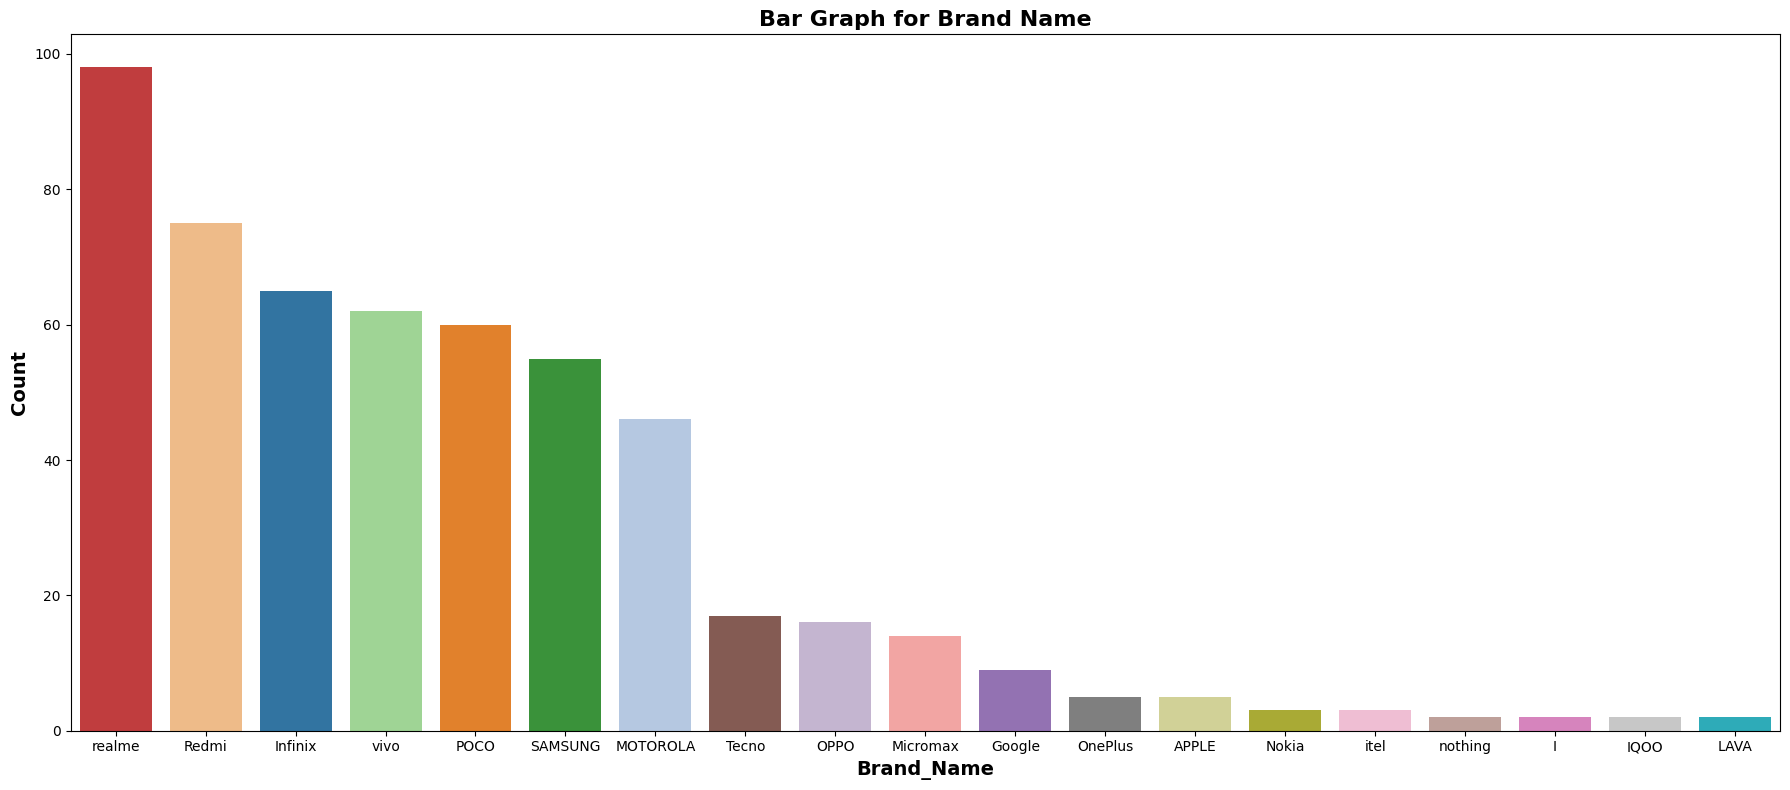

In [91]:
plt.figure(figsize=(18,8))
sns.countplot(data=df,x='Brand_Name',hue='Brand_Name',order=df['Brand_Name'].value_counts().index,palette='tab20',legend=False)
plt.title(f"Bar Graph for Brand Name",fontdict={'fontsize':16,'fontweight':'bold'})
plt.xlabel(f"Brand_Name",fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel("Count",fontdict={'fontsize':14,'fontweight':'bold'})
plt.tight_layout()
plt.show()

Insight : The dataset is dominated by Realme, with Redmi, Infinix, vivo and Poco also showing strong representation. In contrast, brands like Lava, iQOO, i, Nothing, and itel contribute only a small fraction of the total records, suggesting a skew toward a few major brands.

2) Color_Normalized - Checking which color more dominated in the give dataset. 

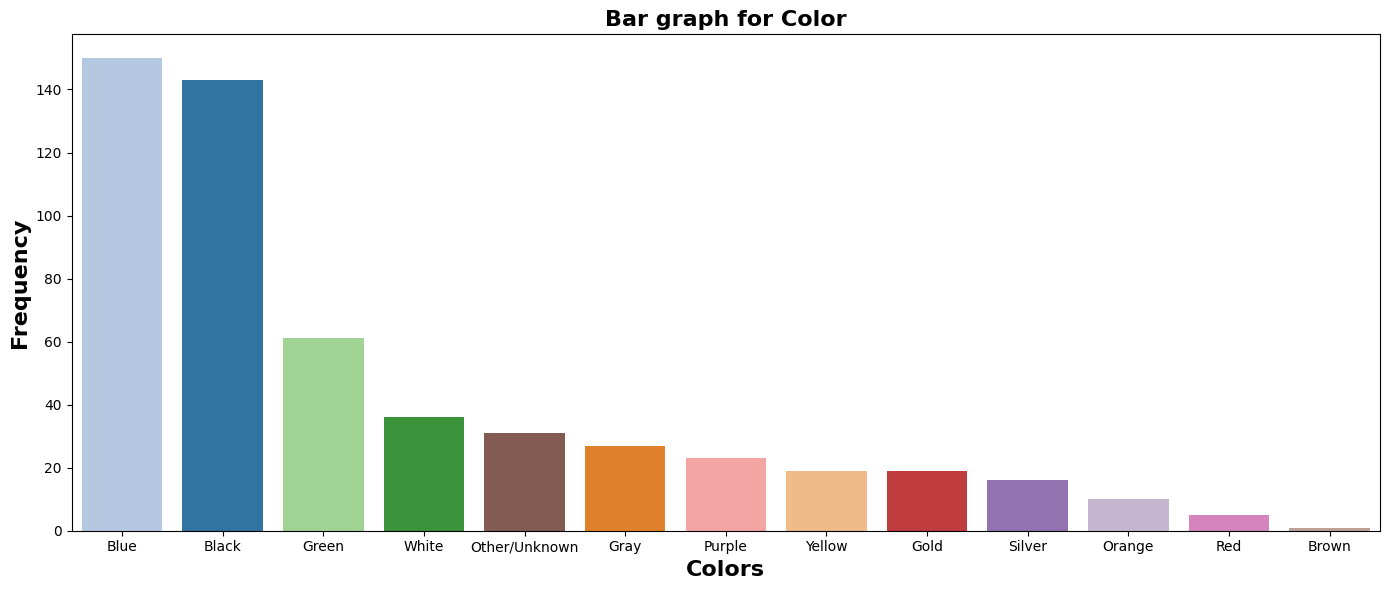

In [92]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='Color_Normalized',hue='Color_Normalized',order=df['Color_Normalized'].value_counts().index,palette='tab20',legend=False)
plt.title("Bar graph for Color",fontdict={'fontsize':16,'fontweight':'bold'})
plt.xlabel("Colors",fontdict={'fontsize':16,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':16,'fontweight':'bold'})
plt.tight_layout()
plt.show()

Insight: Blue and Black are the dominant colors in the dataset, followed by Green and White. Brown is the least represented color.  

3) Memory - Checking which unit of memroy dominant in given dataset 

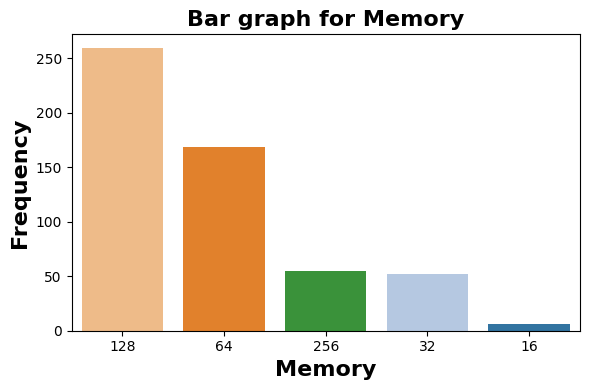

In [93]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Memory',hue='Memory',order=df['Memory'].value_counts().index,palette='tab20',legend=False)
plt.title("Bar graph for Memory",fontdict={'fontsize':16,'fontweight':'bold'})
plt.xlabel("Memory",fontdict={'fontsize':16,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':16,'fontweight':'bold'})
plt.tight_layout()
plt.show()

Insight - Memory unit 128 GB is dominant in the dataset, indicating that most phones come with 128 GB storage. This is followed by 64 GB. The 256 GB and 32 GB variants have nearly similar representation, while 16 GB is the least present in the dataset.

4) RAM - Pie Chart

In [94]:
values = df['RAM'].value_counts()   # count of each RAM unit
length = len(df['RAM'])             # total no. of rows.
percentage = round((values/length) * 100,2)   # calculating the percentage of RAM unit.
percentage


RAM
4    34.38
8    29.02
6    22.37
3     7.39
2     6.84
Name: count, dtype: float64

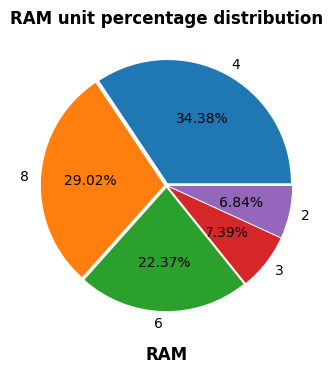

In [95]:
plt.figure(figsize=(6,4))
percentage.plot(kind='pie',autopct = '%1.2f%%',explode = [0.02]*len(values))
plt.title('RAM unit percentage distribution',fontdict={'fontsize':12,'fontweight':'bold'})
plt.xlabel('RAM',fontdict={'fontsize':12,'fontweight':'bold'})
plt.ylabel("")
plt.show()

Insight: 4 GB RAM is the most prevalent configuration, followed by 8 GB and 6 GB. Lower RAM variants (2 GB and 3 GB) contribute the least to the dataset.

5) Battery_  Checking normality of the column by plotting histogram.
             By plotting histogram and kde plot

Histogram

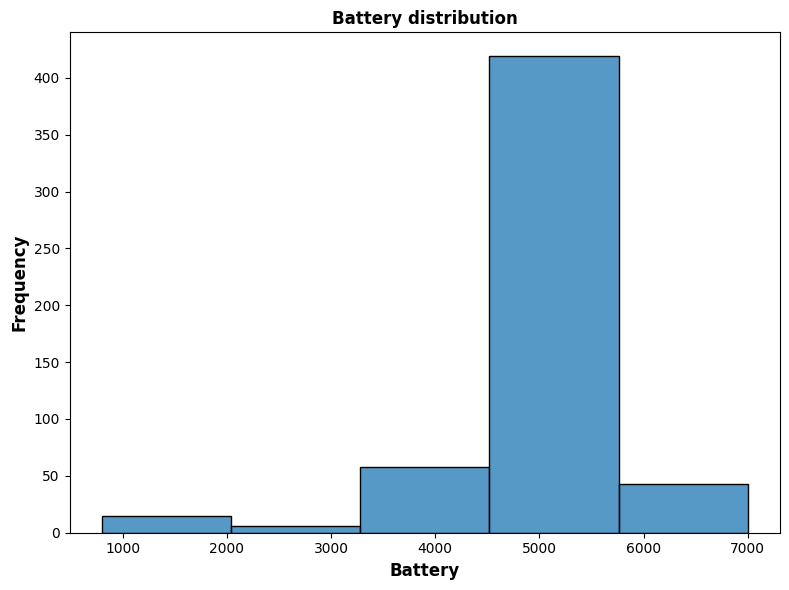

In [96]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Battery_',bins=5)
plt.title('Battery distribution',fontdict={'fontsize':12,'fontweight':'bold'})
plt.xlabel('Battery',fontdict={'fontsize':12,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':12,'fontweight':'bold'})
plt.tight_layout()
plt.show()

KDE plot

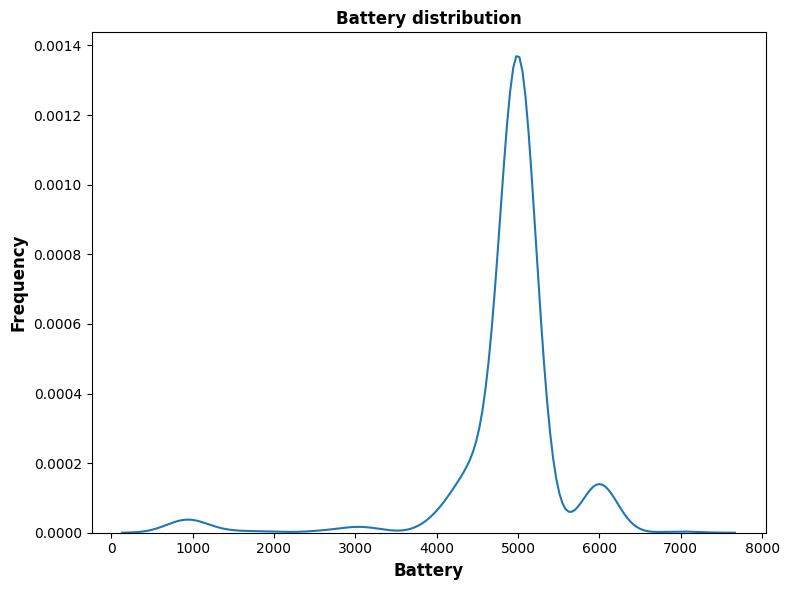

In [97]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x='Battery_')
plt.title('Battery distribution',fontdict={'fontsize':12,'fontweight':'bold'})
plt.xlabel('Battery',fontdict={'fontsize':12,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':12,'fontweight':'bold'})
plt.tight_layout()
plt.show()

Insight : Battery capacity is heavily concentrated around ~5000 mAh, with a smaller secondary concentration near ~6000 mAh and very few low-capacity devices, indicating a non-normal, clustered distribution. Distribution is non-uniform and left-skewness. 

In [98]:
skew = df['Battery_'].skew()   ## checking the skewness 
skew                            ## since it is -ve skewed, applying capping transformation

np.float64(-3.3042495558784655)

Descriptive analysis of Battery_ column

In [99]:
df['Battery_'].describe()

count     541.000000
mean     4871.587800
std       780.148862
min       800.000000
25%      5000.000000
50%      5000.000000
75%      5000.000000
max      7000.000000
Name: Battery_, dtype: float64

6) Rear Camera - Checking which Rear Camera unit is dominant in given data set

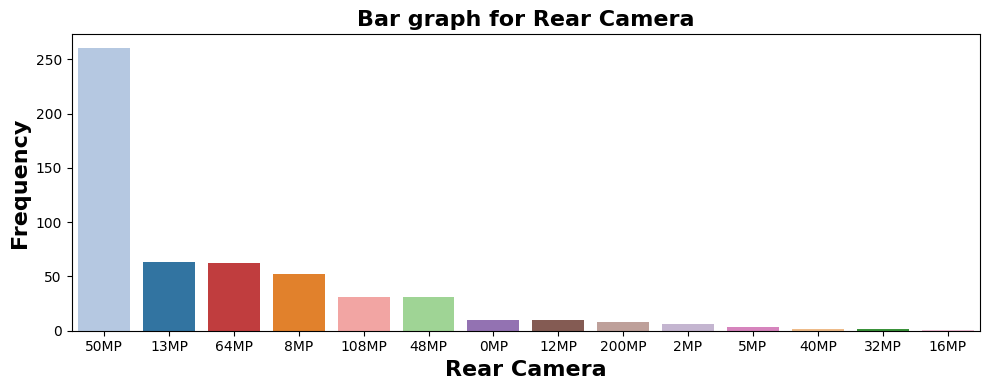

In [100]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Rear Camera',hue='Rear Camera',order=df['Rear Camera'].value_counts().index,palette='tab20',legend=False)
plt.title("Bar graph for Rear Camera",fontdict={'fontsize':16,'fontweight':'bold'})
plt.xlabel("Rear Camera",fontdict={'fontsize':16,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':16,'fontweight':'bold'})
plt.tight_layout()
plt.show()

Insight: The dataset is heavily dominated by 50 MP rear cameras, followed by 13 MP and 64 MP. Other camera resolutions have significantly lower representation, indicating a strong market standardization around 50 MP sensors.

7) Front Camera - Checking which Rear Camera unit is dominant in given data set

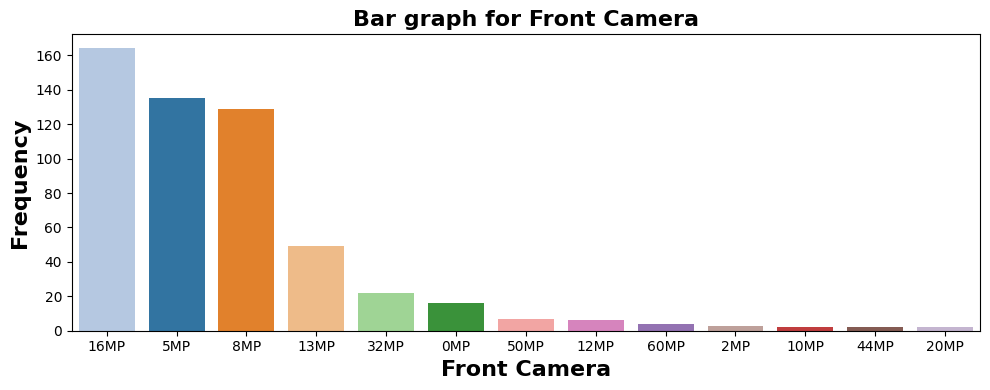

In [101]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Front Camera',hue='Front Camera',order=df['Front Camera'].value_counts().index,palette='tab20',legend=False)
plt.title("Bar graph for Front Camera",fontdict={'fontsize':16,'fontweight':'bold'})
plt.xlabel("Front Camera",fontdict={'fontsize':16,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':16,'fontweight':'bold'})
plt.tight_layout()
plt.show()

Insight: The dataset is dominated by 16 MP front cameras, followed by 5 MP and 8 MP. Higher resolutions (e.g., 32 MP, 50 MP) are comparatively less common, and several front camera categories occur rarely, indicating an imbalanced distribution.

8) AI Lens - 1 represent AI lens is available in phone and 0 represent is unavailable 

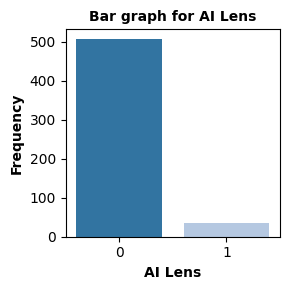

In [102]:
plt.figure(figsize=(3,3))
sns.countplot(data=df,x='AI Lens',hue='AI Lens',order=df['AI Lens'].value_counts().index,palette='tab20',legend=False)
plt.title("Bar graph for AI Lens",fontdict={'fontsize':10,'fontweight':'bold'})
plt.xlabel("AI Lens",fontdict={'fontsize':10,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':10,'fontweight':'bold'})
plt.tight_layout()
plt.show()

Insight: The AI Lens feature is highly imbalanced—most devices are labeled 0 (No AI Lens), while only a small fraction are labeled 1 (AI Lens present).

9) Mobile Height - Checking distribution of Mobile Height. By plotting histograms and kde plots

Histogram

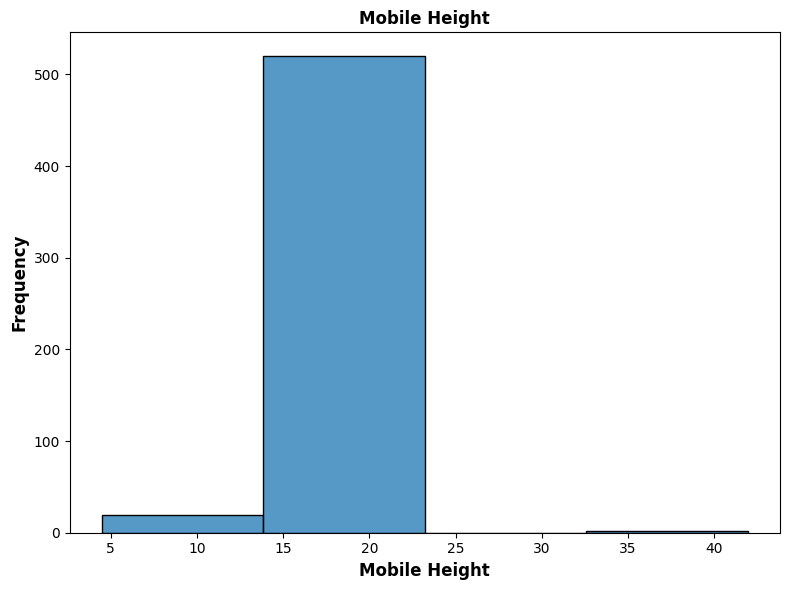

In [103]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Mobile Height',bins=4)
plt.title('Mobile Height',fontdict={'fontsize':12,'fontweight':'bold'})
plt.xlabel('Mobile Height',fontdict={'fontsize':12,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':12,'fontweight':'bold'})
plt.tight_layout()
plt.show()

KDE Plot

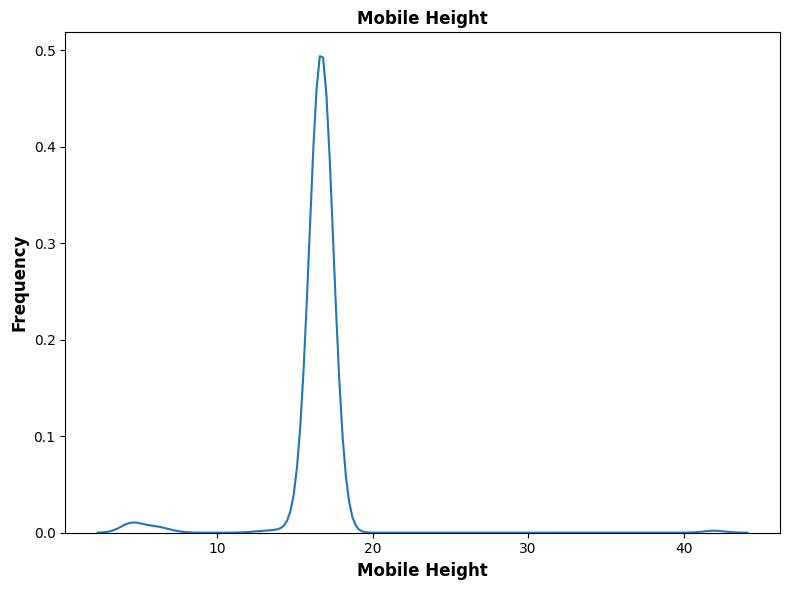

In [104]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x='Mobile Height')
plt.title('Mobile Height',fontdict={'fontsize':12,'fontweight':'bold'})
plt.xlabel('Mobile Height',fontdict={'fontsize':12,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':12,'fontweight':'bold'})
plt.tight_layout()
plt.show()

In [105]:
df['Mobile Height'].describe()   ## checking mean, min, max and percentile

count    541.000000
mean      16.431201
std        2.523553
min        4.500000
25%       16.510000
50%       16.710000
75%       16.940000
max       41.940000
Name: Mobile Height, dtype: float64

Insight : Mobile Height is highly concentrated around 16.7, with a very narrow IQR (16.51–16.94), indicating most devices have similar height values. However, extreme values (min = 4.5, max = 41.94) suggest the presence of significant outliers or possible unit/data-entry issues that may require validation or treatment before modeling.

10) Processor_Vendor - Checking which vendor dominant in given dataset

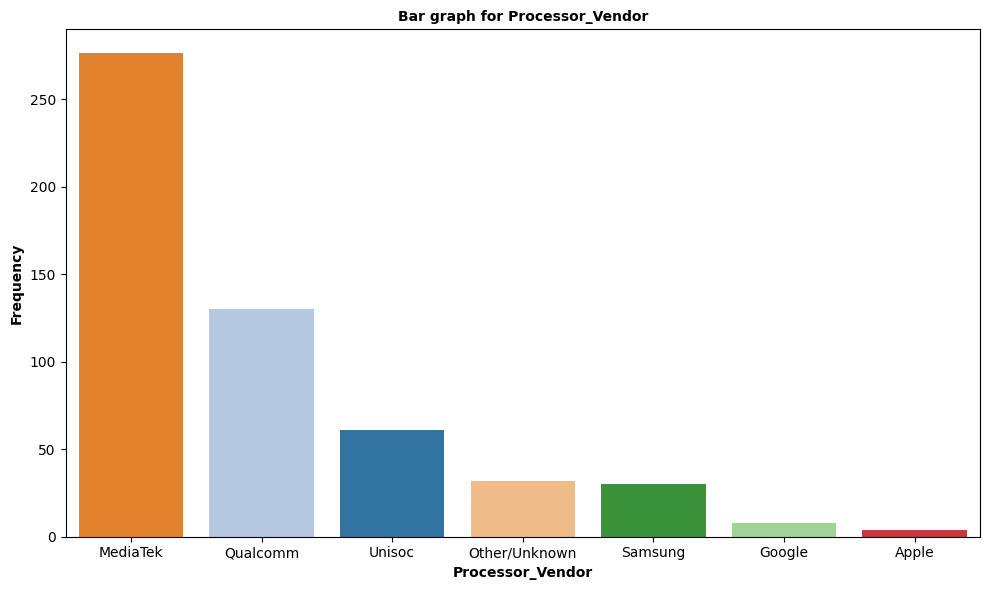

In [106]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Processor_Vendor',hue='Processor_Vendor',order=df['Processor_Vendor'].value_counts().index,palette='tab20',legend=False)
plt.title("Bar graph for Processor_Vendor",fontdict={'fontsize':10,'fontweight':'bold'})
plt.xlabel("Processor_Vendor",fontdict={'fontsize':10,'fontweight':'bold'})
plt.ylabel("Frequency",fontdict={'fontsize':10,'fontweight':'bold'})
plt.tight_layout()
plt.show()

Insight: The dataset is heavily dominated by MediaTek processors, followed by Qualcomm. Unisoc has moderate representation, while Samsung and Other/Unknown appear less frequently. Google and Apple are minimally represented, indicating a strong skew toward Android/budget chipset vendors in the dataset.